In [1]:
import MDAnalysis
import MDAnalysis.analysis.rms
import matplotlib.pyplot as plt
from MDAnalysis.analysis import contacts
from MDAnalysis.analysis import distances
import numpy as np
import pandas as pd

In [2]:
#u = MDAnalysis.Universe('step5_input.psf',['step7_1.dcd',
#                                           'step7_2.dcd',
#                                           'step7_3.dcd',
#                                           'step7_4.dcd',
#                                           'step7_5.dcd',
#                                           'step7_6.dcd',
#                                           'step7_7.dcd',
#                                           'step7_8.dcd',
#                                           'step7_9.dcd',
#                                           'step7_10.dcd',
#                                           'step7_11.dcd',
#                                           'step7_12.dcd',
#                                           'step7_13.dcd',
#                                           'step7_14.dcd',
#                                           'step7_15.dcd',
#                                           'step7_16.dcd',
#                                           'step7_17.dcd',
#                                           'step7_18.dcd',
#                                           'step7_19.dcd',
#                                           'step7_20.dcd',
#                                           'step7_21.dcd',
#                                           'step7_22.dcd',
#                                           'step7_23.dcd',
#                                           'step7_24.dcd',
#                                           'step7_25.dcd',
#                                           'step7_26.dcd',
#                                           'step7_27.dcd',
#                                           'step7_28.dcd',
#                                           'step7_29.dcd',
#                                           'step7_30.dcd',
#                                           'step7_31.dcd',
#                                           'step7_32.dcd',
#                                           'step7_33.dcd',
#                                           'step7_34.dcd',
#                                           'step7_35.dcd',
#                                           'step7_36.dcd',
#                                           'step7_37.dcd',
#                                           'step7_38.dcd',
#                                           'step7_39.dcd',
#                                           'step7_40.dcd',
#                                           'step7_41.dcd',
#                                           'step7_42.dcd',
#                                           'step7_43.dcd',
#                                           'step7_44.dcd',
#                                           'step7_45.dcd',
#                                           'step7_46.dcd',
#                                           'step7_47.dcd',
#                                           'step7_48.dcd',
#                                           'step7_49.dcd',
#                                           'step7_50.dcd',
#                                          ])
#ref = MDAnalysis.Universe('step5_input.psf','step5_input.pdb')
u = MDAnalysis.Universe('prot.pdb','prot.dcd')
ref = MDAnalysis.Universe('prot.pdb')

/usr/local/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:317: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


In [3]:
RA = MDAnalysis.analysis.rms.RMSD(u, ref,select="name CA and segid PROA",groupselections=["name CA and segid PROA and resid 1:299","name CA and segid PROA and resid 320:655"],superposition=True)
RB = MDAnalysis.analysis.rms.RMSD(u, ref,select="name CA and segid PROB",groupselections=["name CA and segid PROB and resid 1550:1876","name CA and segid PROB and resid 1897:2033","name CA and segid PROB and resid 2038:2193"],superposition=True)

RA1 = MDAnalysis.analysis.rms.RMSD(u, ref,select="name CA and segid PROA and resid 1:299",superposition=True)
RA2 = MDAnalysis.analysis.rms.RMSD(u, ref,select="name CA and segid PROA and resid 320:655",superposition=True)
RA3 = MDAnalysis.analysis.rms.RMSD(u, ref,select="name CA and segid PROB and resid 1550:1876",superposition=True)

RC1 = MDAnalysis.analysis.rms.RMSD(u, ref,select="name CA and segid PROB and resid 1897:2033",superposition=True)
RC2 = MDAnalysis.analysis.rms.RMSD(u, ref,select="name CA and segid PROB and resid 2038:2193",superposition=True)

RFV = MDAnalysis.analysis.rms.RMSD(u, ref,select="name CA and protein",superposition=True)

In [4]:
RA.run()
RB.run()
RA1.run()
RA2.run()
RA3.run()
RC1.run()
RC2.run()
RFV.run()

In [5]:
rmsda = RA.rmsd.T   # transpose makes it easier for plotting
rmsdb = RB.rmsd.T
rmsda1 = RA1.rmsd.T
rmsda2 = RA2.rmsd.T
rmsda3 = RA3.rmsd.T
rmsdc2 = RC1.rmsd.T
rmsdc1 = RC2.rmsd.T
rmsdfv = RFV.rmsd.T
#time = rmsda[1]/1000
time = np.multiply(range(len(rmsda[1])),0.1)

/usr/local/lib/python3.9/site-packages/MDAnalysis/analysis/rms.py:710: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


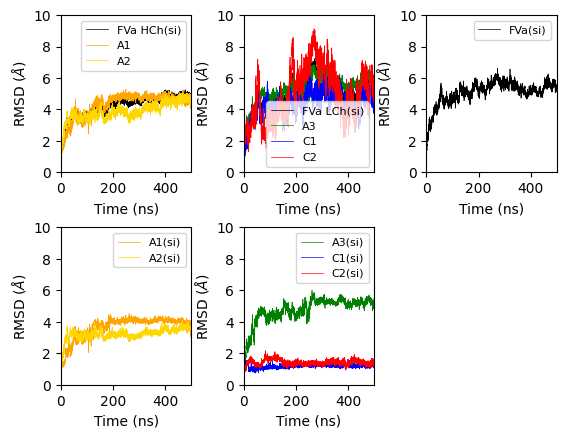

In [7]:
#VIZ.

fig,ax = plt.subplots(2,3)
ax[0,0].plot(time, rmsda[2], color='black',  label="FVa HCh(si)",linewidth=0.5)
ax[0,0].plot(time, rmsda[3], color='orange',  label="A1",linewidth=0.5)
ax[0,0].plot(time, rmsda[4], color='gold',  label="A2",linewidth=0.5)
ax[0,1].plot(time, rmsdb[2], color='black', label="FVa LCh(si)",linewidth=0.5)
ax[0,1].plot(time, rmsdb[3], color='green', label="A3",linewidth=0.5)
ax[0,1].plot(time, rmsdb[4], color='blue', label="C1",linewidth=0.5)
ax[0,1].plot(time, rmsdb[5], color='red', label="C2",linewidth=0.5)
ax[0,0].legend(loc="best",prop={'size': 8})
ax[0,0].set_xlabel("Time (ns)")
ax[0,0].set_ylabel(r"RMSD ($\AA$)")
ax[0,1].legend(loc="best",prop={'size': 8})
ax[0,1].set_xlabel("Time (ns)")
ax[0,1].set_ylabel(r"RMSD ($\AA$)")

ax[1,0].plot(time, rmsda1[2], color='orange',  label="A1(si)",linewidth=0.5)
ax[1,0].plot(time, rmsda2[2], color='gold',  label="A2(si)",linewidth=0.5)
ax[1,0].legend(loc="best",prop={'size': 8})

ax[1,1].plot(time, rmsda3[2], color='green',  label="A3(si)",linewidth=0.5)
ax[1,1].plot(time, rmsdc1[2], color='blue',  label="C1(si)",linewidth=0.5)
ax[1,1].plot(time, rmsdc2[2], color='red',  label="C2(si)",linewidth=0.5)
ax[1,1].legend()

ax[1,0].set_xlabel("Time (ns)")
ax[1,0].set_ylabel(r"RMSD ($\AA$)")
ax[1,1].legend(loc="best",prop={'size': 8})
ax[1,1].set_xlabel("Time (ns)")
ax[1,1].set_ylabel(r"RMSD ($\AA$)")

ax[0,2].plot(time, rmsdfv[2], color='black',  label="FVa(si)",linewidth=0.5)
ax[0,2].legend(loc="best",prop={'size': 8})
ax[0,2].set_xlabel("Time (ns)")
ax[0,2].set_ylabel(r"RMSD ($\AA$)")

fig.subplots_adjust(hspace=0.35,wspace=0.4)

ax[0,0].set_ylim([0,10])
ax[0,1].set_ylim([0,10])
ax[1,0].set_ylim([0,10])
ax[1,1].set_ylim([0,10])
ax[0,2].set_ylim([0,10])

ax[0,0].set_xlim([0,500])
ax[0,1].set_xlim([0,500])
ax[1,0].set_xlim([0,500])
ax[1,1].set_xlim([0,500])
ax[0,2].set_xlim([0,500])

fig.delaxes(ax[1][2])

#ax[0,0].set_xticks(np.arange(0, 600, step=100))

fig.savefig('rmsd.pdf')

In [7]:
#unwrap
#protein = u.select_atoms('all')
#for ts in u.trajectory:
#    protein.unwrap(compound='fragments')

In [8]:
C2dom = u.select_atoms("name CA and segid PROB and resid 2038:2193")
A1dom = u.select_atoms("name CA and segid PROA and resid 1:299")
A1C2doms = u.select_atoms("(name CA and segid PROB and resid 2038:2193) or (name CA and segid PROA and resid 1:299)")


In [9]:
def contacts_within_cutoff(u, group_a, group_b, radius=4.5):
    timeseries = []
    for ts in u.trajectory:
        # calculate distances between group_a and group_b
        dist = contacts.distance_array(group_a.positions, group_b.positions)
        # determine which distances <= radius
        n_contacts = contacts.contact_matrix(dist, radius).sum()
        timeseries.append([ts.frame, n_contacts])
    return np.array(timeseries)

In [10]:
ca = contacts_within_cutoff(u, C2dom, A1dom, radius=10.0)
ca.shape

(5000, 2)

In [11]:
ca_df = pd.DataFrame(ca, columns=['Frame',
                                  '# Contacts'])

In [12]:
def com_dists(u, group_a, group_b):
    timeseries = []
    for ts in u.trajectory:
        # calculate distances between group_a and group_b
        com_a = group_a.center_of_mass()
        com_b = group_b.center_of_mass()
        dist = np.sqrt((com_a[0]-com_b[0])*(com_a[0]-com_b[0])+
                       (com_a[1]-com_b[1])*(com_a[1]-com_b[1])+
                       (com_a[2]-com_b[2])*(com_a[2]-com_b[2]))
        timeseries.append([ts.frame, dist])
    return np.array(timeseries)

In [13]:
#Sanity check!!
sanity=com_dists(u, A1dom, C2dom)

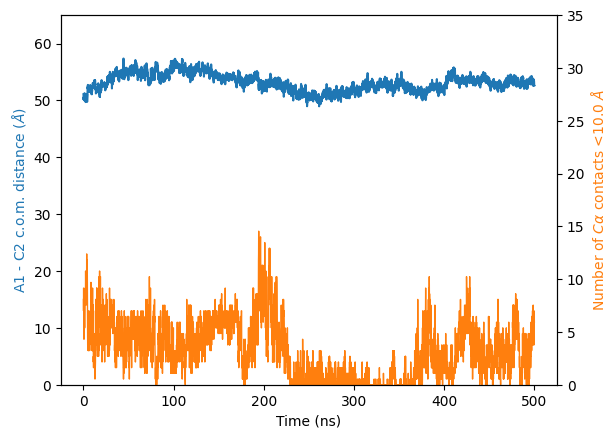

In [14]:
fig,ax=plt.subplots()
tp=sanity.T
ax.plot(tp[0]/10,tp[1],label='A1-C2 com dist',color='tab:blue')
ax.plot(ca_df["Frame"]/10, ca_df["# Contacts"], label='A1-C2 contacts',linewidth=1,color='tab:orange')
ax.set_ylabel("A1 - C2 c.o.m. distance ($\AA$)",color='tab:blue')
ax.set_ylim([0,65])
ax2 = ax.twinx()
ax2.set_ylabel(r"Number of $C\alpha$ contacts <10.0 $\AA$",color='tab:orange')
ax2.set_ylim([0,35])
ax.set_xlabel("Time (ns)")
fig.savefig('a1c2_dist_n_contacts.pdf')

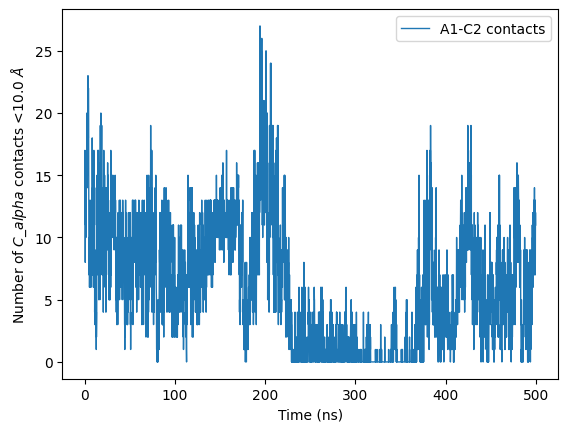

In [15]:
#ca_df.plot(x='Frame')
#plt.ylabel('A1-C2 contacts ($C\_alpha$ within 10.0 $\AA$)')
fig,ax=plt.subplots()
ax.plot(ca_df["Frame"]/10, ca_df["# Contacts"], label='A1-C2 contacts',linewidth=1)
ax.legend()
ax.set_ylabel("Number of $C\_alpha$ contacts <10.0 $\AA$")
ax.set_xlabel("Time (ns)")
fig.savefig('a1c2_contacts.pdf')

In [16]:
cols=range(len(tp[1]))

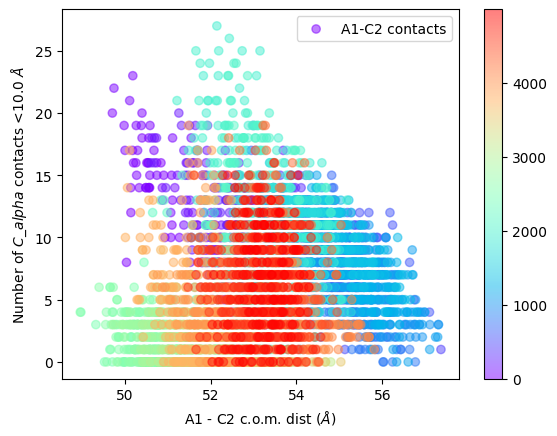

In [17]:
fig,ax=plt.subplots()
im=ax.scatter(tp[1], ca_df["# Contacts"], label='A1-C2 contacts',alpha=0.5,cmap='rainbow',c=cols)
ax.legend()
ax.set_ylabel("Number of $C\_alpha$ contacts <10.0 $\AA$")
ax.set_xlabel("A1 - C2 c.o.m. dist ($\AA$)")

fig.colorbar(im)

fig.savefig('a1c2_contacts_scatter.pdf')


In [18]:
#C2dom = u.select_atoms("name CA and segid PROB and resid 2038:2193")
#A1dom = u.select_atoms("name CA and segid PROA and resid 1:299")
#A1C2doms = u.select_atoms("(name CA and segid PROB and resid 2038:2193) or (name CA and segid PROA and resid 1:299)")

In [19]:
#q1q2 = contacts.q1q2(u, interface_ca_sele, radius=10.0).run() #does not work
q1q2tot = contacts.q1q2(u, "(name CA and segid PROB and resid 2038:2193) or (name CA and segid PROA and resid 1:299)", radius=10).run()
q1q2a1 = contacts.q1q2(u, "name CA and segid PROA and resid 1:299", radius=10).run()
q1q2c2 = contacts.q1q2(u, "name CA and segid PROB and resid 2038:2193", radius=10).run()

/usr/local/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:317: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


In [20]:
q1q2tot_df = pd.DataFrame(q1q2tot.timeseries,columns=['Frame','Q1','Q2'])
q1q2a1_df = pd.DataFrame(q1q2a1.timeseries,columns=['Frame','Q1','Q2'])
q1q2c2_df = pd.DataFrame(q1q2c2.timeseries,columns=['Frame','Q1','Q2'])

/usr/local/lib/python3.9/site-packages/MDAnalysis/analysis/contacts.py:489: DeprecationWarning: The `timeseries` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.timeseries` instead
  warnings.warn(wmsg, DeprecationWarning)
/usr/local/lib/python3.9/site-packages/MDAnalysis/analysis/contacts.py:489: DeprecationWarning: The `timeseries` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.timeseries` instead
  warnings.warn(wmsg, DeprecationWarning)
/usr/local/lib/python3.9/site-packages/MDAnalysis/analysis/contacts.py:489: DeprecationWarning: The `timeseries` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.timeseries` instead
  warnings.warn(wmsg, DeprecationWarning)


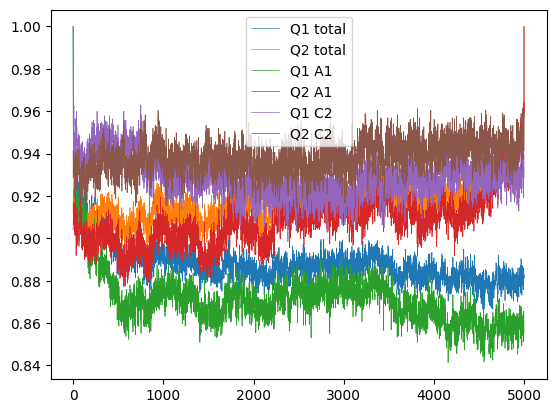

In [21]:
#q1q2tot_df.plot(x='Frame')
#plt.ylabel('Fraction of native contacts')
lw=0.5
fig,ax=plt.subplots()
ax.plot(q1q2tot_df["Frame"], q1q2tot_df["Q1"], label='Q1 total',linewidth=lw)
ax.plot(q1q2tot_df["Frame"], q1q2tot_df["Q2"], label='Q2 total',linewidth=lw)
ax.plot(q1q2a1_df["Frame"], q1q2a1_df["Q1"], label='Q1 A1',linewidth=lw)
ax.plot(q1q2a1_df["Frame"], q1q2a1_df["Q2"], label='Q2 A1',linewidth=lw)
ax.plot(q1q2c2_df["Frame"], q1q2c2_df["Q1"], label='Q1 C2',linewidth=lw)
ax.plot(q1q2c2_df["Frame"], q1q2c2_df["Q2"], label='Q2 C2',linewidth=lw)
ax.legend()